# Project_titanic

## ■ 사전 작업 : 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')

# Load the Titanic dataset into a DataFrame

df = pd.read_csv('titanic.csv')

## ■ 사전 작업 : 데이터 확인

In [2]:
df.head()

# 기본 정보
# PassengerId : 승객 ID
# Survived:  0은 사망자, 1은 생존자
# Pclass : 객실 등급
# Name : 승객 이름
# Age : 승객 나이
# SibSp: 함께 탑승한 형제 자매 또는 배우자의 수
# Parch: 함께 탑승한 부모, 아이의 수
# Ticket : 티켓 번호
# Fare : 지불 요금(티켓 가격)
# Cabin: 객실 번호
# Embarked : 탑승 항구

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

# Age, Cabin, Embarked는 결측값이 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## ■ 과제내용

### 1. DataFrame 데이터 탐색

In [5]:
# 1.1 생존자 중 몇 명인지 계산하세요.

survivors_count = df['Survived'].sum()
print("1.1 생존자 수 : ", survivors_count)

1.1 생존자 수 :  342


In [6]:
# 1.2 항구 "S"에서 탑승한 승객 수를 계산하세요.

s_passengers_count = (df['Embarked'] == 'S').sum()
print("1.2 항구'S'에서의 탑승객 수 : ", s_passengers_count)

1.2 항구'S'에서의 탑승객 수 :  644


In [7]:
# 1.3 남성 승객 수를 계산하세요.

male_passengers_count = (df['Sex'] == 'male').sum()
print("1.3 남성 승객수 : ", male_passengers_count)

1.3 남성 승객수 :  577


In [8]:
# 1.4 3등실에 탑승하고 지불한 요금이 40.000 미만인 승객 수를 계산하세요.

third_class_low_fare_count = ((df['Pclass'] == 3) & (df['Fare'] < 40)).sum()
print("1.4 3등실에 탑승하고 요금이 40.000 미만인 승객 수 :", third_class_low_fare_count)

1.4 3등실에 탑승하고 요금이 40.000 미만인 승객 수 : 471


In [9]:
# 1.5 승객 ID가 674인 승객의 이름을 찾아보세요.

passenger_674_name = df.loc[df['PassengerId'] == 674, 'Name'].values[0]
print("1.5 승객 ID 674 승객의 이름 :", passenger_674_name)

1.5 승객 ID 674 승객의 이름 : Wilhelms, Mr. Charles


In [10]:
# 1.6 승객들의 평균 나이를 계산하세요.

average_age = df['Age'].mean()
print("1.6 승객 평균 나이 :", average_age)

1.6 승객 평균 나이 : 29.69911764705882


In [11]:
# 1.7 생존자와 사망자의 수를 각각 계산하시오.

survivors = df[df['Survived'] == 1]['Survived'].count()
deaths = df[df['Survived'] == 0]['Survived'].count()

print("1.7 생존자 수 :", survivors)
print("    사망자 수 :", deaths)

1.7 생존자 수 : 342
    사망자 수 : 549


In [12]:
# 1.8 남성과 여성의 승객 수를 계산하시오.

gender_counts = df['Sex'].value_counts()
print("1.8 남성 및 여성 승객의 수 : \n", gender_counts)

1.8 남성 및 여성 승객의 수 : 
 male      577
female    314
Name: Sex, dtype: int64


In [13]:
# 1.9 각 성별에 따른 생존자와 사망자의 수를 계산하세요.[DataFrame.groupby() 함수 이용]
# Survived = 0 사망자, Survived = 1 생존자

gender_survival_counts = df.groupby(['Sex', 'Survived'])['PassengerId'].count().unstack()
print("1.9 성별에 따른 사망자와 생존자 수 : \n", gender_survival_counts)

1.9 성별에 따른 사망자와 생존자 수 : 
 Survived    0    1
Sex               
female     81  233
male      468  109


In [14]:
# 1.10 각 등급별로 생존한 사람과 사망한 사람의 평균 지불 요금을 계산하세요.[DataFrame.pivot_table() 함수 이용]
# Survived = 0 사망자, Survived = 1 생존자

payment_rate_by_class = df.pivot_table(index='Pclass', columns='Survived', values='Fare', aggfunc='mean')
print("1.10  각 등급별로 사망자와 생존자의 평균 지불 요금 : \n", payment_rate_by_class)

1.10  각 등급별로 사망자와 생존자의 평균 지불 요금 : 
 Survived          0          1
Pclass                        
1         64.684007  95.608029
2         19.412328  22.055700
3         13.669364  13.694887


In [15]:
# 1. DataFrame 데이터 탐색 결과(종합)
print("1. DataFrame 데이터 탐색 결과(종합)")
print("--------------------------------------")
print("1.1 생존자 수 :", survivors_count)
print("--------------------------------------")
print("1.2 항구'S'에서의 탑승객 수 :", s_passengers_count)
print("--------------------------------------")
print("1.3 남성 승객수 :", male_passengers_count)
print("--------------------------------------")
print("1.4 3등실에 탑승하고 요금이 40.000 미만인 승객 수 :", third_class_low_fare_count)
print("--------------------------------------")
print("1.5 승객 ID 674 승객의 이름 :", passenger_674_name)
print("--------------------------------------")
print("1.6 승객 평균 나이 :", average_age)
print("--------------------------------------")
print("1.7 생존자 수 :", survivors)
print("    사망자 수 :", deaths)
print("--------------------------------------")
print("1.8 남성 및 여성 승객의 수 : \n", gender_counts)
print("--------------------------------------")
print("1.9 성별에 따른 사망자와 생존자 수 : \n", gender_survival_counts)
print("--------------------------------------")
print("1.10  각 등급별로 사망자와 생존자의 평균 지불 요금 : \n", payment_rate_by_class)

1. DataFrame 데이터 탐색 결과(종합)
--------------------------------------
1.1 생존자 수 : 342
--------------------------------------
1.2 항구'S'에서의 탑승객 수 : 644
--------------------------------------
1.3 남성 승객수 : 577
--------------------------------------
1.4 3등실에 탑승하고 요금이 40.000 미만인 승객 수 : 471
--------------------------------------
1.5 승객 ID 674 승객의 이름 : Wilhelms, Mr. Charles
--------------------------------------
1.6 승객 평균 나이 : 29.69911764705882
--------------------------------------
1.7 생존자 수 : 342
    사망자 수 : 549
--------------------------------------
1.8 남성 및 여성 승객의 수 : 
 male      577
female    314
Name: Sex, dtype: int64
--------------------------------------
1.9 성별에 따른 사망자와 생존자 수 : 
 Survived    0    1
Sex               
female     81  233
male      468  109
--------------------------------------
1.10  각 등급별로 사망자와 생존자의 평균 지불 요금 : 
 Survived          0          1
Pclass                        
1         64.684007  95.608029
2         19.412328  22.055700
3         13.669364  13.694887


## ******************************************************************************

### 2. DataFrame 데이터 시각화

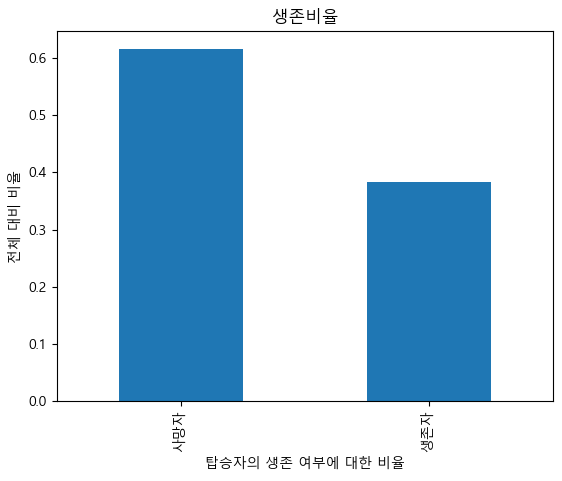

2.1  탑승자의 생존 여부에 대한 비율 : 
 0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [16]:
# 2.1 탑승자의 생존 여부에 대한 비율을 계산하고, 이 비율을 막대 그래프로 시각화
# Survived = 0 사망자, Survived = 1 생존자

survival_rate = df['Survived'].value_counts(normalize=True)
survival_rate.plot(kind='bar', title='생존비율')
plt.xticks([0, 1], ['사망자', '생존자'])
plt.xlabel('탑승자의 생존 여부에 대한 비율')
plt.ylabel('전체 대비 비율')
plt.show()

print("2.1  탑승자의 생존 여부에 대한 비율 : \n", survival_rate)

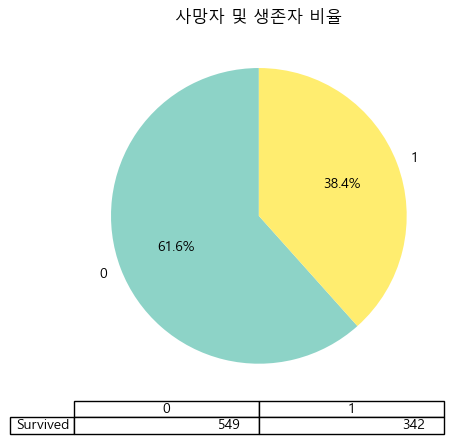

In [17]:
pie=df['Survived'].value_counts().plot.pie(autopct='%.1f%%',cmap='Set3', startangle=90,table=True)
pie.set_title('사망자 및 생존자 비율')
pie.set_label
pie.set_ylabel('')
plt.show()

# 사망자의 비율이 61.6%로 생존자에 비해 더 많은 비율을 차지하고 있음

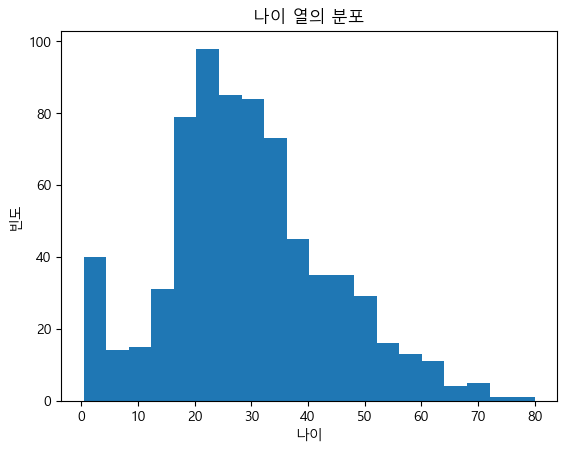

In [18]:
# 2.2 나이 열의 분포를 20개의 구간(bin)으로 나누어 히스토그램으로 시각화

df['Age'].plot(kind='hist', bins=20, title='나이 열의 분포') # bins 데이터를 20개의 구간으로 나눔
plt.xlabel('나이')
plt.ylabel('빈도')
plt.show()

# 20~40 부근이 가장 많다.
# 승객 중 나이는 20대~30대가 주를 이루고 있는 것으로 보인다.

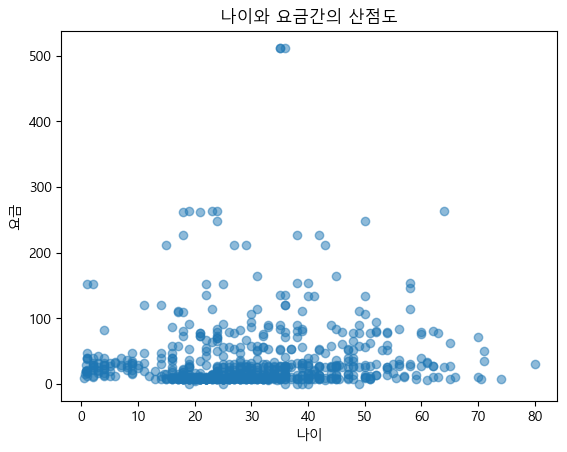

In [19]:
# 2.3 나이와 요금 간의 산점도 시각화

plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.title('나이와 요금간의 산점도')
plt.xlabel('나이')
plt.ylabel('요금')
plt.show()

# 30대에서 너무 높은 요금을 지불하여서 나이와 요금간의 산점도로 어느 나이대에서 높은 요금을 내었는지 표현이 잘 안됨

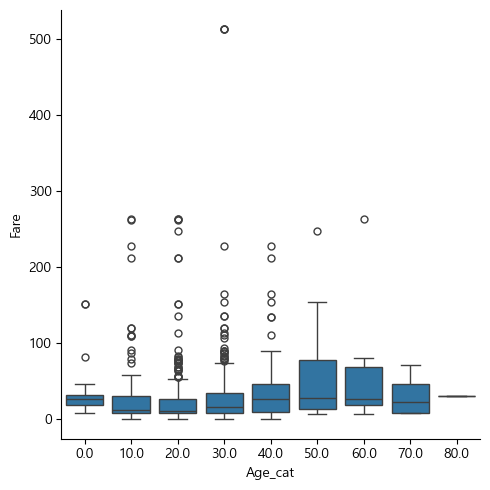

In [20]:
#나이대 가져오는 함수 만들기
def age_cat(age):
    age = (age//10)*10
    return age
    
Age_cat = df.Age.apply(age_cat) #함수를 적용한 새 필드 만들기
Age_cat = Age_cat.astype('category') #타입을 카테고리로 변경
df.insert(6,'Age_cat',Age_cat) #데이터프레임에 필드 추가하기

sns.catplot(data=df,x='Age_cat',y='Fare',kind='box')

# 박스플롯을 사용하여 다시 시각화한 결과 나이가 높아질 수록 (특히 50대, 60대) 높은 요금을 지불한 것으로 확인됨

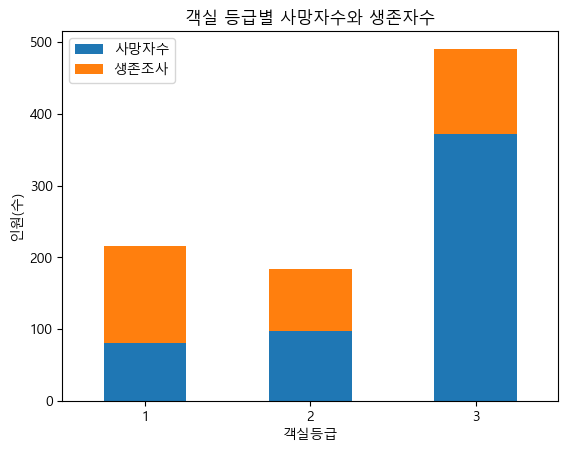

In [21]:
# 2.4 객실 등급(Pclass)별로 생존자와 사망자 수를 막대그래프로 시각화

survival_by_class = df.groupby(['Pclass', 'Survived'])['PassengerId'].count().unstack()
survival_by_class.plot(kind='bar', stacked=True, title='객실 등급별 사망자수와 생존자수')
plt.xlabel('객실등급')
plt.ylabel('인원(수)')
plt.xticks(rotation=0)
plt.legend(['사망자수', '생존조사'])
plt.show()

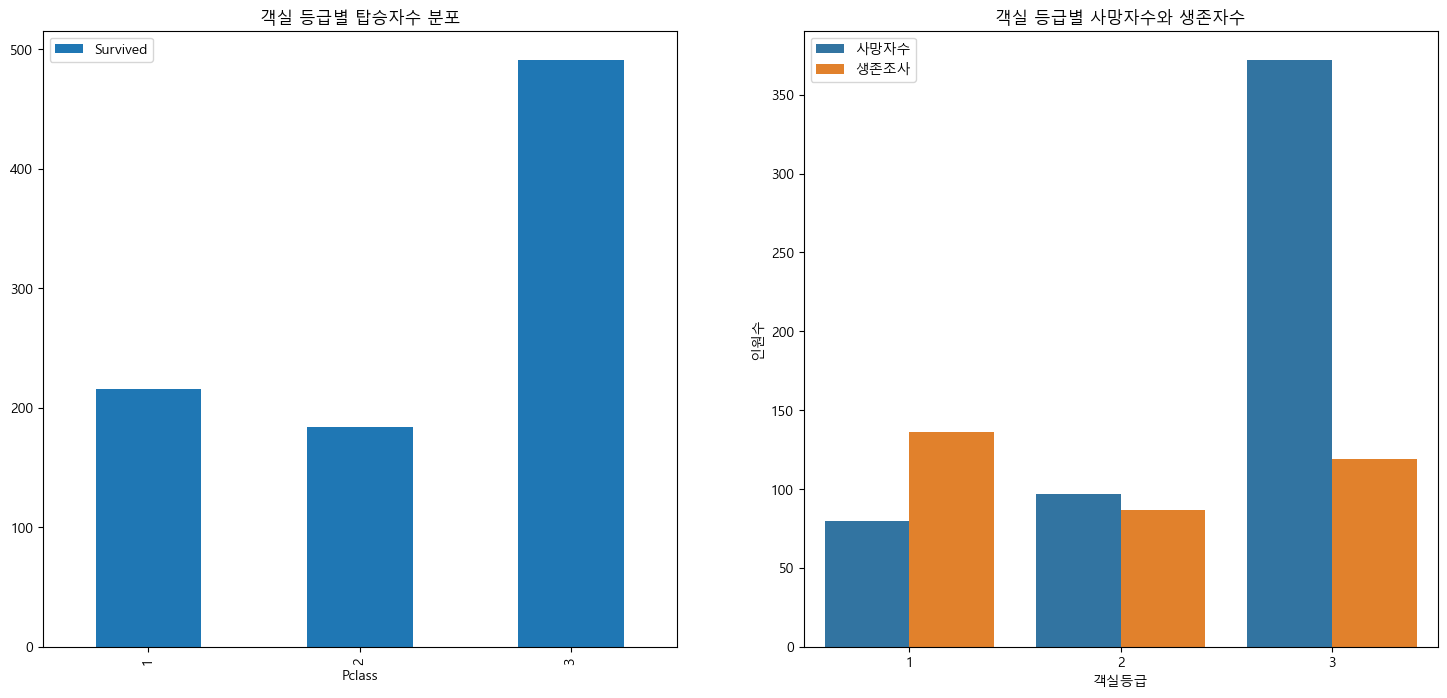

In [22]:
# 객실 등급별 탑승자 분포와 객실등급별 사망자수와 생존자 수
f, ax = plt.subplots(1,2,figsize=(18,8))
bar1=df[['Pclass','Survived']].groupby(['Pclass']).count().plot.bar(ax=ax[0])
bar1.set_title('객실 등급별 탑승자수 분포')

# pclass별 생존자
bar2=sns.countplot(hue='Survived',x='Pclass',data=df)
bar2.set_title('객실 등급별 사망자수와 생존자수')
plt.legend(['사망자수', '생존조사'])
plt.xlabel('객실등급')
plt.ylabel('인원수')
plt.show()

# "객실등급 : 3" 이 사망자가 가장 많고 생존자는 "객실등급 : 1"이 가장 많다.